In [8]:
import pandas as pd

# Series

* `Series`对象是一个1D数组，类似于spreadsheet的Column
* `DataFrame`对象时一个2D数组，类似于spreadsheet

## 创建Series

In [7]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## 和1D的`ndarray`相似

Series对象和numpy的1D `ndarray`相似，所以可以直接当做numpy的参数

In [9]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

也可以进行算数运算

In [10]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

broadcasting 也适用

In [12]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [13]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## 索引标签

默认使用从0开始的数字进行索引，也可以手动指定

In [15]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [16]:
s2["bob"]

np.int64(83)

为了更清楚的使用，推荐使用label进行索引的时候使用`loc`，序数进行索引的时候使用`iloc`。

In [18]:
s2.loc["bob"]

np.int64(83)

In [19]:
s2.iloc[1]

np.int64(83)

切片

In [20]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

使用numeric标签进行访问的时候，可能会出现一些意外

In [21]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [22]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

第一个数据的label是2。

In [23]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


In [24]:
surprise_slice.iloc[0]

np.int64(1002)

## 从`dict`初始化

In [25]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

可以使用index来指定那些数据按照什么顺序排列

In [27]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## 自动对齐

相同label进行对齐

In [31]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

看起来是个很方便的功能。但是如果没有正确设置到index。可能会有意外的结果

In [32]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

## 用标量初始化

可以使用1个标量和一些index来初始化，所有的值都会初始化为这个标量

In [34]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series`名字

In [36]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## 绘制`Series`

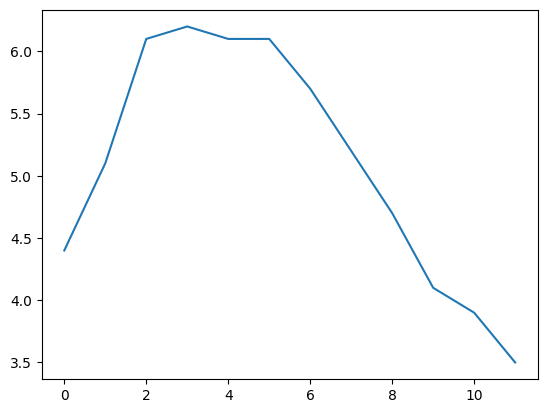

In [39]:
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

# 处理时间

许多数据集都有时间戳，而 pandas 非常擅长处理此类数据：
* 它可以代表周期（例如2016Q3）和频率（例如“每月”），
* 它可以将周期转换为实际时间戳，反之亦然，
* 它可以以您喜欢的方式重新采样数据和聚合值，
* 它可以处理时区。

## 时间范围

创建一个从 2016/10/29 5:30pm 开始，间隔为1个小时，共12小时的DatetimeIndex。

In [43]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='h')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='h')

使用这个DatetimeIndex作为index

In [44]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: h, dtype: float64

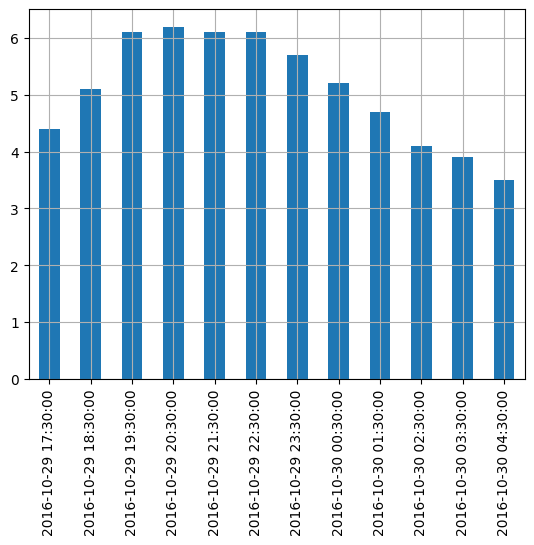

In [46]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

## 重采样

# DataFrame

DataFrame 对象代表一个电子表格，包含单元格值、列名称和行索引标签。您可以定义表达式来根据其他列计算列、创建数据透视表、对行进行分组、绘制图表等。您可以将DataFrame视为Series的字典。

In [50]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [51]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [52]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [53]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [54]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [55]:
masked_array = np.ma.asarray(values, dtype=object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


In [56]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


In [57]:
people = pd.DataFrame({
    "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice": "Biking", "bob": "Dancing"},
    "weight": {"alice": 68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0
